In [1]:
# !pip install joblib


In [2]:
import joblib
print(joblib.__version__)


1.4.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 아이오와 주택 데이터 설명

### 1. **기본 정보**
* Id: 고유 식별자 (각 주택의 고유 번호)
* MSSubClass: 주택 유형
  * 20: 1층 1946 이후 건축
  * 30: 1층 1945 이전 건축
  * 40: 1층 마감되지 않은 모든 연도
  * 45: 1.5층 마감되지 않은 모든 연도
  * 50: 1.5층 마감된 모든 연도
  * 60: 2층 1946 이후 건축
  * 70: 2층 1945 이전 건축
  * 75: 2.5층 모든 연도
  * 80: 스플릿 또는 멀티레벨
  * 85: 스플릿 포이어
  * 90: 듀플렉스 - 모든 스타일과 연도
  * 120: 1층 PUD (계획 단위 개발) - 1946 이후 건축
  * 150: 1.5층 PUD - 모든 연도
  * 160: 2층 PUD - 1946 이후 건축
  * 180: PUD - 멀티레벨 - 인클라인
  * 190: 2층 PUD - 1945 이전 건축
* MSZoning: 주택 구역
  * RL: 주거용 저밀도
  * RM: 주거용 중밀도
  * C (all): 상업용
  * FV: 주거용 고밀도
  * RH: 주거용 고밀도
* LotFrontage: 거리와 접한 면적 (피트 단위)
* LotArea: 부지 면적 (평방 피트)
* Street: 도로 유형
  * Pave: 포장도로
  * Grvl: 자갈도로
  * Alley: 골목 접근 유형
  * Grvl: 자갈
  * Pave: 포장
  * NA: 없음
* LotShape: 부지 형태
* Reg: 정규형
  * IR1: 약간 불규칙형
  * IR2: 중간 불규칙형
  * IR3: 매우 불규칙형
* LandContour: 토지 윤곽
  * Lvl: 평지
  * Bnk: 경사면
  * HLS: 언덕
  * Low: 저지대
* Utilities: 유틸리티 유형
  * AllPub: 모든 공공 서비스
  * NoSewr: 하수도 없음
  * NoSeWa: 하수도 및 물 없음
  * ELO: 전기만
* LotConfig: 부지 구성
  * Inside: 내부
  * Corner: 코너
  * CulDSac: 막다른 길
  * FR2: 2면 도로
  * FR3: 3면 도로
* LandSlope: 토지 경사도
  * Gtl: 완만
  * Mod: 보통
  * Sev: 심함
* Neighborhood: 인근 지역
  * CollgCr: College Creek
  * Veenker: Veenker
  * Crawfor: Crawford
  * NoRidge: North Ridge
  * Mitchel: Mitchell
  * Somerst: Somerset
  * NWAmes: Northwest Ames
  * OldTown: Old Town
  * BrkSide: Brookside
  * Sawyer: Sawyer
  * NridgHt: Northridge Heights
  * IDOTRR: Iowa DOT and Rail Road
  * MeadowV: Meadow Village
  * Edwards: Edwards
  * Timber: Timberland
  * Gilbert: Gilbert
  * StoneBr: Stone Brook
  * ClearCr: Clear Creek
  * NPkVill: Northpark Villa
  * Blueste: Bluestem
  * SawyerW: Sawyer West
  * Greens: Greens
  * GrnHill: Green Hills
  * Landmrk: Landmarks
* Condition1: 주요 도로 또는 철도 근접도
  * Norm: 정상
  * Feedr: 피더 도로
  * Artery: 주요 도로
  * RRAe: 철도 인접 (동쪽)
  * RRAn: 철도 인접 (북쪽)
  * PosN: 양호 (북쪽)
  * PosA: 양호 (동쪽)
  * RRNe: 철도 인접 (북동쪽)
  * RRnN: 철도 인접 (북쪽)
* Condition2: 주요 도로 또는 철도 근접도
  * Norm: 정상
  * Feedr: 피더 도로
  * Artery: 주요 도로
  * RRAe: 철도 인접 (동쪽)
  * RRAn: 철도 인접 (북쪽)
  * PosN: 양호 (북쪽)
  * PosA: 양호 (동쪽)
  * RRNe: 철도 인접 (북동쪽)
  * RRnN: 철도 인접 (북쪽)
* BldgType: 건물 유형
  * 1Fam: 단독 주택
  * 2fmCon: 2가구 주택
  * Duplex: 듀플렉스
  * TwnhsE: 타운하우스 (끝)
  * TwnhsI: 타운하우스 (내부)
* HouseStyle: 주택 스타일
  * 1Story: 1층
  * 1.5Fin: 1.5층 마감
  * 1.5Unf: 1.5층 미마감
  * 2Story: 2층
  * 2.5Fin: 2.5층 마감
  * 2.5Unf: 2.5층 미마감
  * SFoyer: 스플릿 포이어
  * SLvl: 스플릿 레벨
* OverallQual: 전체 재료 및 마감 품질 (1~10 등급)
* OverallCond: 전체 상태 (1~10 등급)
* YearBuilt: 건축 연도
* YearRemodAdd: 리모델링 연도
  * RoofStyle: 지붕 스타일
  * Flat: 평지붕
  * Gable: 박공
  * Gambrel: 갬브렐
  * Hip: 힙
  * Mansard: 맨사드
  * Shed: 셰드
  * RoofMatl: 지붕 재료
  * ClyTile: 점토 타일
  * CompShg: 복합 아스팔트
  * Membran: 멤브레인
  * Metal: 금속
  * Roll: 롤
  * Tar&Grv: 타르 및 자갈
  * WdShake: 목재 쉐이크
  * WdShngl: 목재 싱글
* Exterior1st: 외부 마감재 1
  * AsbShng: 아스베스트 쉐이크
  * AsphShn: 아스팔트 쉐이크
  * BrkComm: 벽돌 커먼
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * CemntBd: 시멘트 보드
  * HdBoard: 하드보드
  * ImStucc: 인조 스터코
  * MetalSd: 금속 사이딩
  * Other: 기타
  * Plywood: 합판
  * PreCast: 프리캐스트
  * Stone: 돌
  * Stucco: 스터코
  * VinylSd: 비닐 사이딩
  * Wd Sdng: 목재 사이딩
  * WdShing: 목재 쉐이크
* Exterior2nd: 외부 마감재 2
  * AsbShng: 아스베스트 쉐이크
  * AsphShn: 아스팔트 쉐이크
  * BrkComm: 벽돌 커먼
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * CemntBd: 시멘트 보드
  * HdBoard: 하드보드
  * ImStucc: 인조 스터코
  * MetalSd: 금속 사이딩
  * Other: 기타
  * Plywood: 합판
  * PreCast: 프리캐스트
  * Stone: 돌
  * Stucco: 스터코
  * VinylSd: 비닐 사이딩
  * Wd Sdng: 목재 사이딩
  * WdShing: 목재 쉐이크
* MasVnrType: 외장 벽 마감재 유형
  * BrkCmn: 일반 벽돌
  * BrkFace: 벽돌 페이스
  * CBlock: 콘크리트 블록
  * None: 없음
  * Stone: 돌
* MasVnrArea: 외장 벽 마감재 면적 (평방 피트)
* ExterQual: 외부 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* Ex terCond: 외부 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* Foundation: 기초 유형
  * BrkTil: 벽돌 타일
  * CBlock: 콘크리트 블록
  * PConc: 콘크리트
  * Slab: 슬래브
  * Stone: 돌
  * Wood: 목재
* BsmtQual: 지하실 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* BsmtCond: 지하실 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* Bs mtExposure: 지하실 노출 정도
  * Gd: 좋음
  * Av: 평균
  * Mn: 최소
  * No: 없음
  * NA: 없음
* BsmtFinType1: 지하실 마감 유형 1
  * GLQ: 좋은 생활 공간
  * ALQ: 평균 생활 공간
  * BLQ: 저급 생활 공간
  * Rec: 레크리에이션 공간
  * LwQ: 저품질
  * Unf: 미마감
  * NA: 없음
* BsmtFinSF1: 지하 마감 면적 1 (평방 피트)
* BsmtFinType2: 지하실 마감 유형 2
  * GLQ: 좋은 생활 공간
  * ALQ: 평균 생활 공간
  * BLQ: 저급 생활 공간
  * Rec: 레크리에이션 공간
  * LwQ: 저품질
  * Unf: 미마감
  * NA: 없음
* BsmtFinSF2: 지하 마감 면적 2 (평방 피트)
* BsmtUnfSF: 지하 미마감 면적 (평방 피트)
* TotalBsmtSF: 지하 전체 면적 (평방 피트)
* Heating: 난방 유형
  * Floor: 바닥 난방
  * GasA: 가스 에어
  * GasW: 가스 물
  * Grav: 중력
  * OthW: 기타 물
  * Wall: 벽 난방
* HeatingQC: 난방 품질 및 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* CentralAir: 중앙 에어컨 여부
  * Y: 있음
  * N: 없음
* Electrical: 전기 시스템
  * SBrkr: 서킷 브레이커
  * FuseA: 퓨즈 A
  * FuseF: 퓨즈 F
  * FuseP: 퓨즈 P
  * Mix: 혼합
* 1stFlrSF: 1층 면적 (평방 피트)
* 2ndFlrSF: 2층 면적 (평방 피트)
* LowQualFinSF: 저품질 마감 면적 (평방 피트)
* GrLivArea: 지상 생활 면적 (평방 피트)
* BsmtFullBath: 지하 전체 욕실 개수
* BsmtHalfBath: 지하 반 욕실 개수
* FullBath: 지상 전체 욕실 개수
* HalfBath: 지상 반 욕실 개수
* BedroomAbvGr: 지상 침실 개수
* KitchenAbvGr: 지상 주방 개수
* KitchenQual: 주방 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
* TotRmsAbvGrd: 지상 총 방 개수 (욕실 제외)
* Functional: 주택 기능성
  * Typ: 일반
  * Min1: 경미한 결함
  * Min2: 경미한 결함 2
  * Mod: 보통 결함
  * Maj1: 주요 결함 1
  * Maj2: 주요 결함 2
  * Sev: 심각한 결함
  * Sal: 판매 불가
* Fireplaces: 벽난로 개수
* FireplaceQu: 벽난로 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* GarageType: 차고 유형
  * 2Types: 2가지 유형
  * Attchd: 부착형
  * Basment: 지하
  * BuiltIn: 내장형
  * CarPort: 카포트
  * Detchd: 분리형
  * NA: 없음
* GarageYrBlt: 차고 건축 연도
* GarageFinish: 차고 내부 마감 상태
  * Fin: 마감
  * RFn: 부분 마감
  * Unf: 미마감
  * NA: 없음
* GarageCars: 차고에 주차 가능한 차량 수
* GarageArea: 차고 면적 (평방 피트)
* GarageQual: 차고 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* GarageCond: 차고 상태
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * Po: 매우 나쁨
  * NA: 없음
* PavedDrive: 포장된 진입로 여부
  * Y: 있음
  * P: 부분
  * N: 없음
* WoodDeckSF: 목재 데크 면적 (평방 피트)
* OpenPorchSF: 개방형 현관 면적 (평방 피트)
* EnclosedPorch: 폐쇄형 현관 면적 (평방 피트)
* 3SsnPorch: 3계절 현관 면적 (평방 피트)
* ScreenPorch: 스크린 현관 면적 (평방 피트)
* PoolArea: 수영장 면적 (평방 피트)
* PoolQC: 수영장 품질
  * Ex: 우수
  * Gd: 좋음
  * TA: 보통
  * Fa: 나쁨
  * NA: 없음
* Fence: 울타리 품질
  * GdPrv: 좋은 사생활
  * MnPrv: 보통 사생활
  * GdWo: 좋은 목재
  * MnWw: 보통 목재
  * NA: 없음
* MiscFeature: 기타 기능
  * Elev: 엘리베이터
  * Gar2: 2차 차고
  * Othr: 기타
  * Shed: 창고
  * TenC: 테니스 코트
  * NA: 없음
* MiscVal: 기타 기능의 가치 (달러)
* MoSold: 판매 월
* YrSold: 판매 연도
* SaleType: 판매 유형
  * WD: 보증 증서
  * CWD: 보증 증서 및 특별 보증
  * VWD: 보증 증서 및 특별 보증
  * New: 신축
  * COD: 현금 거래
  * Con: 계약
  * SaleType: 판매 유형
  * WD: 보증 증서
  * CWD: 보증 증서 및 특별 보증
  * VWD: 보증 증서 및 특별 보증
  * New: 신축
  * COD: 현금 거래
  * Con: 계약
  * ConLw: 계약 저가
  * ConLI: 계약 저가 (개인)
  * ConLD: 계약 저가 (개발자)
  * Oth: 기타
* SaleCondition: 판매 조건
  * Normal: 정상
  * Abnorml: 비정상
  * AdjLand: 인접 토지
  * Alloca: 할당
  * Family: 가족
  * Partial: 부분
* SalePrice: 판매 가격 (목표 변수)

In [4]:
data = pd.read_csv("../06_machine_learning/data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# 컬럼 표시 수 설정하기
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [6]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [7]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [8]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical',
       'Id', 'Functional', 'Fireplaces', 'KitchenQual', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'TotRmsAbvGrd',
       'GarageCars', 'GrLivArea', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'BsmtFullBath', 'HeatingQC', 'LowQualFinSF', 'LandSlope', 'OverallQual',
       'HouseStyle', 'BldgType', 'Condition2', 'Condition1', 'Neighborhood',
       'LotConfig', 'YearBuilt', 'Utilities', 'LandContour', 'LotShape',
       'Street', 'LotArea', 'MSZoning', 'OverallCond', 'YearRemodAdd',
       '2ndFlrSF', 'BsmtFinSF2', '1stF

In [9]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
KitchenQual       0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Id                0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
W

In [11]:
data = data.drop(["FireplaceQu", "Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtFinType1      2.534247
BsmtCond          2.534247
MasVnrArea        0.547945
Electrical        0.068493
TotRmsAbvGrd      0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
BsmtFullBath      0.000000
GrLivArea         0.000000
Functional        0.000000
MSSubClass        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
3SsnPorch         0.000000
2ndFlrSF          0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
P

In [13]:
missing_cols = ['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'Electrical']

In [14]:
for col in missing_cols:
    print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else: 
        data[col] = data[col].fillna(data[col].median())
    

LotFrontage float64
GarageYrBlt float64
GarageCond object
GarageType object
GarageFinish object
GarageQual object
BsmtFinType2 object
BsmtExposure object
BsmtQual object
BsmtFinType1 object
BsmtCond object
MasVnrArea float64
Electrical object


In [15]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

# 많은 컬럼 중 어떤 컬럼을 골라야 할까?
* 컬럼의 상관분석을 통해 타겟변수(종속변수)와 상관도가 높은 컬럼만 선택
* 트리계열의 알고리즘을 사용해 선분석 후 중요 변수만 추출해서 재분석

In [16]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [17]:
data2 = data.copy()

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# 상관분석을 통해 종속변수와 관련 높은 변수 선택 후 분석

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [20]:
data = pd.get_dummies(data)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [21]:
corr_rate = data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)['SalePrice']

In [22]:
corr_rate.head(15)

SalePrice           1.000000
OverallQual         0.809829
GrLivArea           0.731310
GarageCars          0.690711
YearBuilt           0.652682
GarageArea          0.649379
FullBath            0.635957
TotalBsmtSF         0.602725
1stFlrSF            0.575408
ExterQual_Gd        0.574642
YearRemodAdd        0.571159
GarageYrBlt         0.563256
Foundation_PConc    0.562287
TotRmsAbvGrd        0.532586
Fireplaces          0.519247
Name: SalePrice, dtype: float64

In [23]:
new_cols1 = corr_rate.head(15).index

In [24]:
corr_rate.tail(100)

SaleType_ConLD          -0.044713
SaleType_Oth            -0.044950
Street_Grvl             -0.045814
Neighborhood_Mitchel    -0.046305
Exterior2nd_Brk Cmn     -0.047830
Exterior2nd_Stucco      -0.049140
Condition2_Artery       -0.049343
Condition2_RRNn         -0.049761
SaleCondition_Family    -0.049906
LandSlope_Gtl           -0.050034
Condition1_RRAe         -0.050865
BsmtFinType2_BLQ        -0.053089
GarageQual_Po           -0.057941
ExterCond_Gd            -0.058472
Electrical_FuseP        -0.059844
Condition2_Feedr        -0.059951
Exterior2nd_HdBoard     -0.061353
Exterior1st_BrkComm     -0.061646
BsmtCond_Po             -0.062679
MiscVal                 -0.062727
Neighborhood_SWISU      -0.064570
Functional_Min1         -0.066816
LowQualFinSF            -0.067719
SaleCondition_AdjLand   -0.067949
Exterior2nd_Wd Shng     -0.068178
MSZoning_RH             -0.074084
HouseStyle_1Story       -0.078627
Functional_Min2         -0.078754
Exterior1st_WdShing     -0.079073
Heating_Wall  

In [25]:
new_cols2 = corr_rate.tail(4).index

In [26]:
list(new_cols1) + list(new_cols2)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [27]:
data = data[list(new_cols1) + list(new_cols2)]
data

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,548,2,856,856,True,2003,2003.0,True,8,0,False,False,False,False
1,181500,6,1262,2,1976,460,2,1262,1262,False,1976,1976.0,False,6,1,True,False,False,True
2,223500,7,1786,2,2001,608,2,920,920,True,2002,2001.0,True,6,1,False,False,False,False
3,140000,7,1717,3,1915,642,1,756,961,False,1970,1998.0,False,7,1,False,True,True,True
4,250000,8,2198,3,2000,836,2,1145,1145,True,2000,2000.0,True,9,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,1999,460,2,953,953,False,2000,1999.0,True,7,1,True,False,False,True
1456,210000,6,2073,2,1978,500,2,1542,2073,False,1988,1978.0,False,7,2,True,False,True,True
1457,266500,7,2340,1,1941,252,2,1152,1188,False,2006,1941.0,False,9,2,False,True,False,False
1458,142125,5,1078,1,1950,240,1,1078,1078,False,1996,1950.0,False,5,0,False,True,True,True


In [28]:
data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
SalePrice,1.000000,0.809829,0.731310,0.690711,0.652682,0.649379,0.635957,0.602725,0.575408,0.574642,0.571159,0.563256,0.562287,0.532586,0.519247,-0.581803,-0.583512,-0.620915,-0.637785
OverallQual,0.809829,1.000000,0.603262,0.608756,0.647392,0.541552,0.576372,0.459915,0.408730,0.603276,0.557723,0.592010,0.586764,0.427806,0.420626,-0.581192,-0.590344,-0.556712,-0.673842
GrLivArea,0.731310,0.603262,1.000000,0.505094,0.288493,0.468211,0.658419,0.371026,0.494421,0.358133,0.282400,0.274625,0.332373,0.827874,0.480804,-0.376159,-0.338674,-0.362334,-0.413922
GarageCars,0.690711,0.608756,0.505094,1.000000,0.601519,0.853317,0.518310,0.455508,0.450580,0.443029,0.456245,0.564786,0.480178,0.386244,0.325520,-0.423255,-0.504415,-0.489950,-0.506121
YearBuilt,0.652682,0.647392,0.288493,0.601519,1.000000,0.528281,0.537420,0.427187,0.293363,0.593575,0.684388,0.845595,0.704001,0.176820,0.174655,-0.512248,-0.700552,-0.632360,-0.644772
GarageArea,0.649379,0.541552,0.468211,0.853317,0.528281,1.000000,0.444459,0.486685,0.489797,0.389859,0.398267,0.540450,0.400205,0.330549,0.264543,-0.393538,-0.413167,-0.449457,-0.453014
FullBath,0.635957,0.576372,0.658419,0.518310,0.537420,0.444459,1.000000,0.328036,0.366891,0.449973,0.431390,0.524892,0.480765,0.558665,0.268548,-0.430333,-0.513693,-0.450629,-0.485598
TotalBsmtSF,0.602725,0.459915,0.371026,0.455508,0.427187,0.486685,0.328036,1.000000,0.829292,0.313044,0.299042,0.319936,0.296406,0.233913,0.325687,-0.307764,-0.317195,-0.385379,-0.383999
1stFlrSF,0.575408,0.408730,0.494421,0.450580,0.293363,0.489797,0.366891,0.829292,1.000000,0.225259,0.240265,0.214327,0.179926,0.361777,0.394883,-0.268281,-0.215559,-0.326525,-0.294636
ExterQual_Gd,0.574642,0.603276,0.358133,0.443029,0.593575,0.389859,0.449973,0.313044,0.225259,1.000000,0.532550,0.569570,0.586748,0.212665,0.181413,-0.617598,-0.541969,-0.483784,-0.906121


<Axes: >

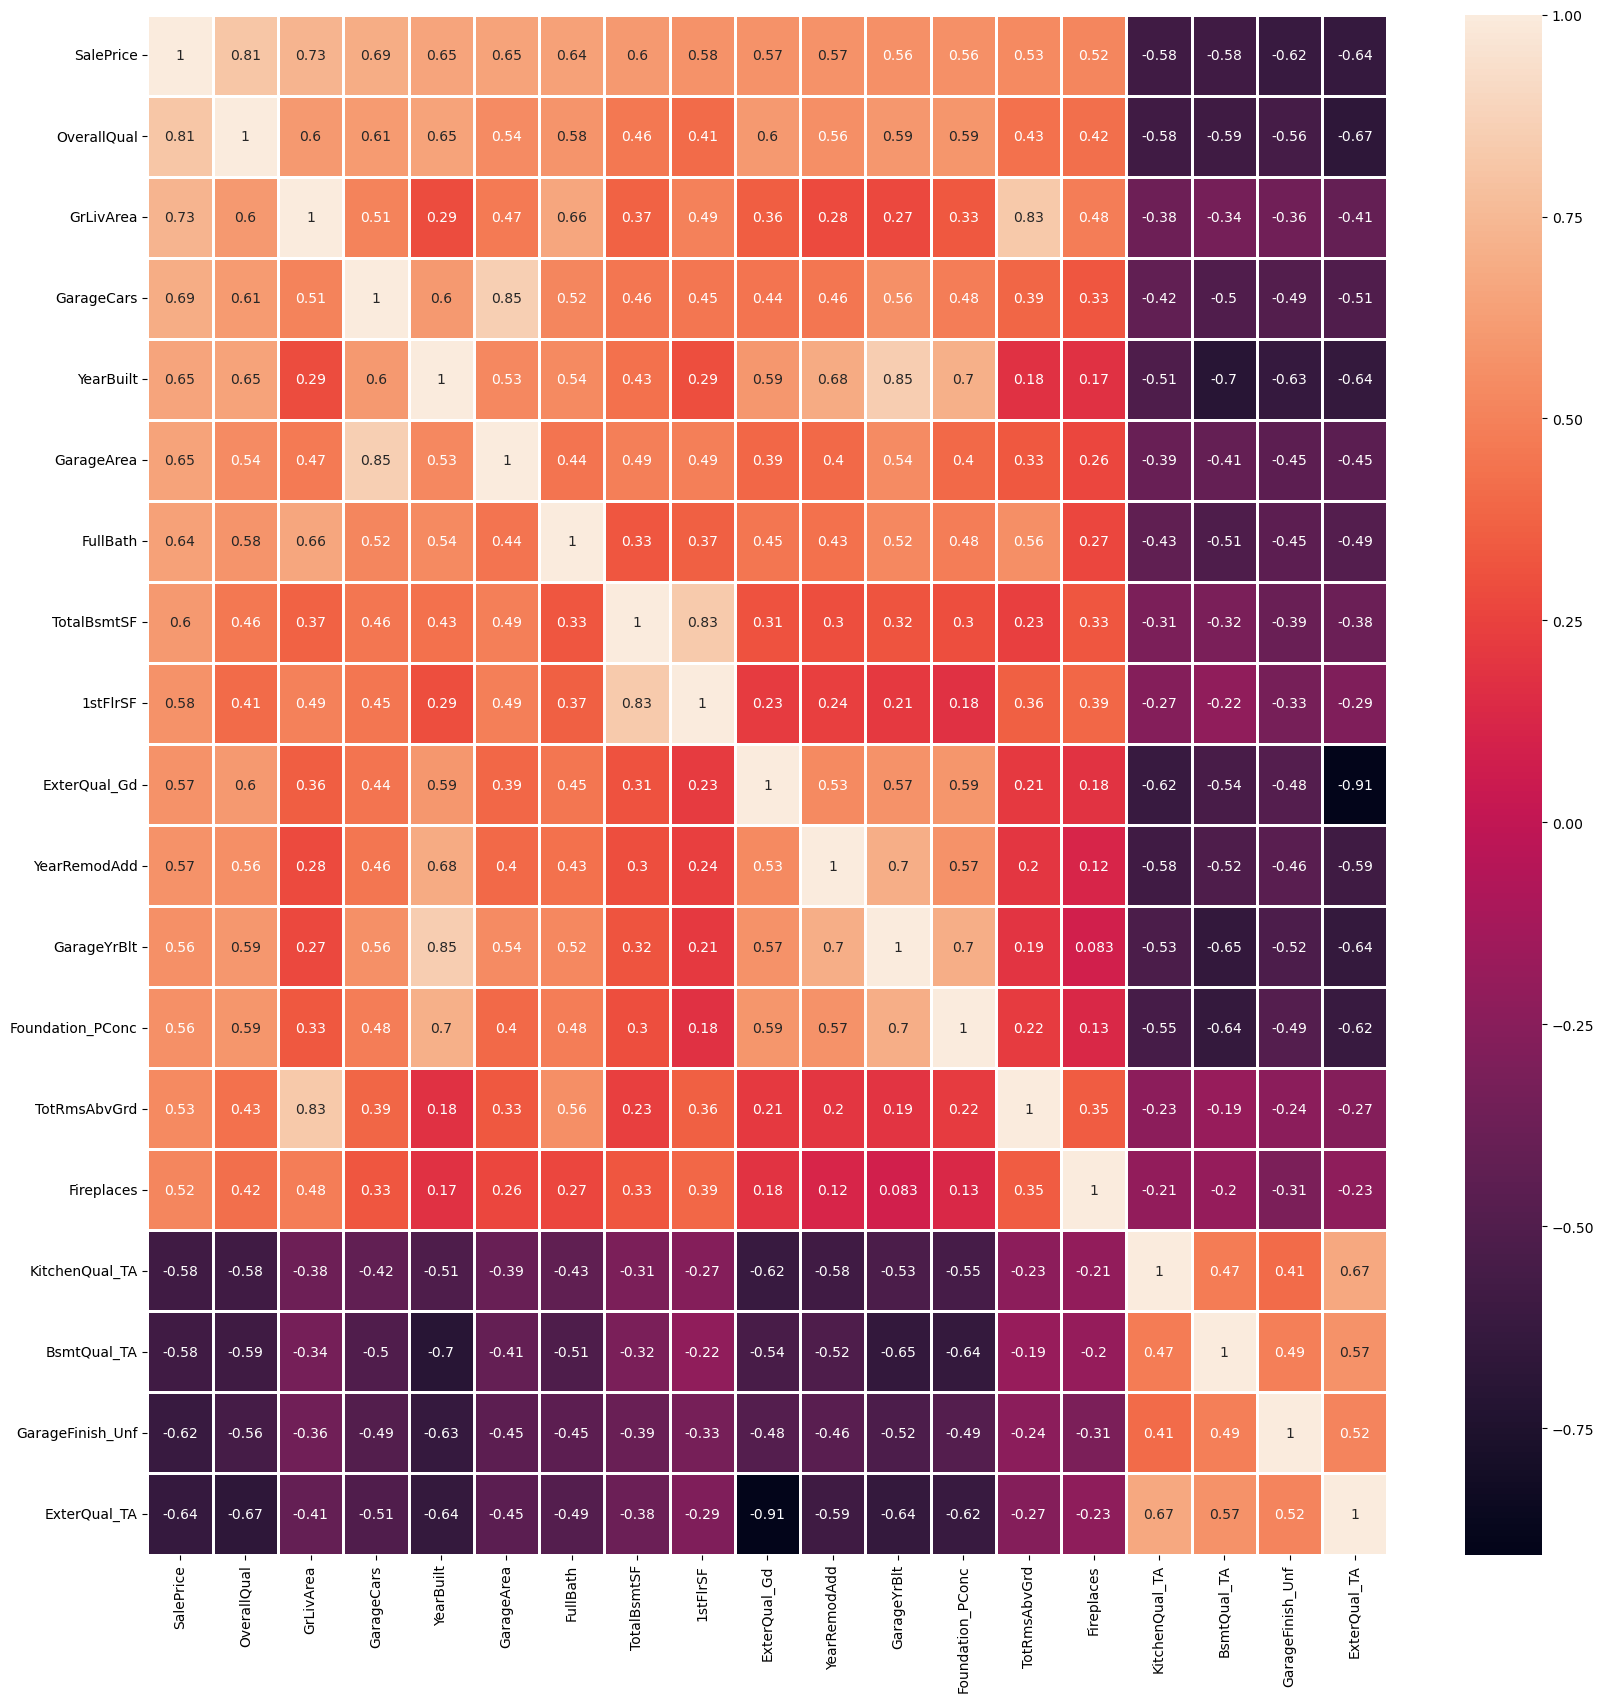

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(method='spearman').sort_values(by='SalePrice', ascending=False), annot=True, linewidth=1)

* ExterQual_TA - ExterQal_gd -0.91
* yearBuilt - BsmtQual_TA -0.7
* yearBuilt - GarageYrBlt - 0.85
* yearBuilt - Foundation_PConc - 0.7
* TotRmsAbvGrd - GrLivArea 0.83
* garagecars - garageArea 0.85

제거 대상 컬럼 TotRmsAbvGrd, GarageArea, Foundation_PConc, BsmtQual_TA, GarageYrBlt 

In [30]:
data.corr(method='spearman').sort_values(by='SalePrice', ascending=False)['SalePrice']

SalePrice           1.000000
OverallQual         0.809829
GrLivArea           0.731310
GarageCars          0.690711
YearBuilt           0.652682
GarageArea          0.649379
FullBath            0.635957
TotalBsmtSF         0.602725
1stFlrSF            0.575408
ExterQual_Gd        0.574642
YearRemodAdd        0.571159
GarageYrBlt         0.563256
Foundation_PConc    0.562287
TotRmsAbvGrd        0.532586
Fireplaces          0.519247
KitchenQual_TA     -0.581803
BsmtQual_TA        -0.583512
GarageFinish_Unf   -0.620915
ExterQual_TA       -0.637785
Name: SalePrice, dtype: float64

In [31]:
data = data.drop(['TotRmsAbvGrd', 'GarageArea', 'Foundation_PConc', 'BsmtQual_TA', 'GarageYrBlt'], axis=1)
data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,2,856,856,True,2003,0,False,False,False
1,181500,6,1262,2,1976,2,1262,1262,False,1976,1,True,False,True
2,223500,7,1786,2,2001,2,920,920,True,2002,1,False,False,False
3,140000,7,1717,3,1915,1,756,961,False,1970,1,False,True,True
4,250000,8,2198,3,2000,2,1145,1145,True,2000,1,False,False,False


In [32]:
X = data.drop("SalePrice", axis=1)
y = data['SalePrice']

In [33]:
X

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,7,1710,2,2003,2,856,856,True,2003,0,False,False,False
1,6,1262,2,1976,2,1262,1262,False,1976,1,True,False,True
2,7,1786,2,2001,2,920,920,True,2002,1,False,False,False
3,7,1717,3,1915,1,756,961,False,1970,1,False,True,True
4,8,2198,3,2000,2,1145,1145,True,2000,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,1999,2,953,953,False,2000,1,True,False,True
1456,6,2073,2,1978,2,1542,2073,False,1988,2,True,True,True
1457,7,2340,1,1941,2,1152,1188,False,2006,2,False,False,False
1458,5,1078,1,1950,1,1078,1078,False,1996,0,False,True,True


<Axes: >

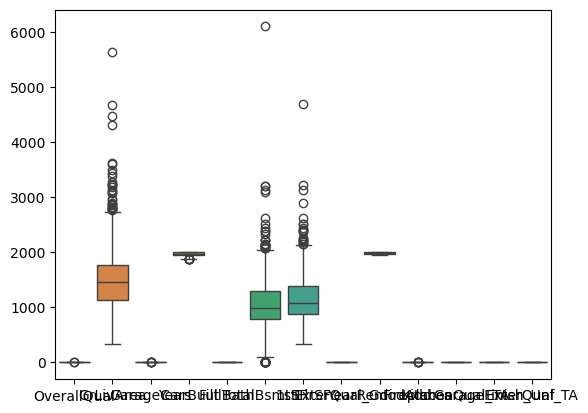

In [34]:
sns.boxplot(X)

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd', 'YearRemodAdd', 'Fireplaces',
       'KitchenQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

In [37]:
import joblib

In [38]:
rs = RobustScaler()
rs.fit(X)
X_scaled = rs.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,0.5,0.380070,0.0,0.652174,0.0,-0.269652,-0.453608,1.0,0.243243,-1.0,-1.0,0.0,-1.0
1,0.0,-0.312090,0.0,0.065217,0.0,0.538308,0.343643,0.0,-0.486486,0.0,0.0,0.0,0.0
2,0.5,0.497489,0.0,0.608696,0.0,-0.142289,-0.327933,1.0,0.216216,0.0,-1.0,0.0,-1.0
3,0.5,0.390885,1.0,-1.260870,-1.0,-0.468657,-0.247423,0.0,-0.648649,0.0,-1.0,1.0,0.0
4,1.0,1.134029,1.0,0.586957,0.0,0.305473,0.113893,1.0,0.162162,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.282735,0.0,0.565217,0.0,-0.076617,-0.263132,0.0,0.162162,0.0,0.0,0.0,0.0
1456,0.0,0.940904,0.0,0.108696,0.0,1.095522,1.936181,0.0,-0.162162,1.0,0.0,1.0,0.0
1457,0.5,1.353418,-1.0,-0.695652,0.0,0.319403,0.198331,0.0,0.324324,1.0,-1.0,0.0,-1.0
1458,-0.5,-0.596369,-1.0,-0.500000,-1.0,0.172139,-0.017673,0.0,0.054054,-1.0,-1.0,1.0,0.0


# joblib으로 스케일러 저장하기

In [39]:
joblib.dump(rs, './model/iowa_robustscaler.joblib')

['./model/iowa_robustscaler.joblib']

In [40]:
X_scaled.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd', 'YearRemodAdd', 'Fireplaces',
       'KitchenQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [43]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-09-12 10:35:27.856806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 10:35:30.717801: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-12 10:35:30.717936: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-12 10:35:30.722055: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-12 10:35:31.205582: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


In [44]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


2024-09-12 10:35:31.708290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 10:35:31.710724: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (AMD Radeon(TM) Graphics)
2024-09-12 10:35:31.794588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:35:31.794633: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-09-12 10:35:31.794655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20)
modelpath = "./model/iowa_house{epoch:03d}__{val_loss:.4f}.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, validation_data=(X_test, y_test),  callbacks=[early_stop, checkpoint])

Epoch 1/2000
1/6 [====>.........................] - ETA: 2s - loss: 38166142976.0000

2024-09-12 10:35:32.381282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 10:35:32.438838: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:35:32.438905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 50ms/step - loss: 39644897280.0000 - val_loss: 37625626624.0000
Epoch 2/2000
6/6 [==============================] - ETA: 0s - loss: 39644704768.0000

2024-09-12 10:35:32.712848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 10:35:32.730936: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:35:32.730996: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 28ms/step - loss: 39644704768.0000 - val_loss: 37625417728.0000
Epoch 3/2000
6/6 [==============================] - 0s 28ms/step - loss: 39644475392.0000 - val_loss: 37625159680.0000
Epoch 4/2000
6/6 [==============================] - 0s 26ms/step - loss: 39644172288.0000 - val_loss: 37624815616.0000
Epoch 5/2000
6/6 [==============================] - 0s 23ms/step - loss: 39643770880.0000 - val_loss: 37624348672.0000
Epoch 6/2000
6/6 [==============================] - 0s 28ms/step - loss: 39643217920.0000 - val_loss: 37623713792.0000
Epoch 7/2000
6/6 [==============================] - 0s 24ms/step - loss: 39642480640.0000 - val_loss: 37622841344.0000
Epoch 8/2000
6/6 [==============================] - 0s 24ms/step - loss: 39641456640.0000 - val_loss: 37621657600.0000
Epoch 9/2000
6/6 [==============================] - 0s 24ms/step - loss: 39640055808.0000 - val_loss: 37620031488.0000
Epoch 10/2000
6/6 [==============================] - 0s 25ms/

6/6 [==============================] - 0s 25ms/step - loss: 17932808192.0000 - val_loss: 16597069824.0000
Epoch 71/2000
6/6 [==============================] - 0s 23ms/step - loss: 17083180032.0000 - val_loss: 15774609408.0000
Epoch 72/2000
6/6 [==============================] - 0s 24ms/step - loss: 16242334720.0000 - val_loss: 14984248320.0000
Epoch 73/2000
6/6 [==============================] - 0s 24ms/step - loss: 15425056768.0000 - val_loss: 14209992704.0000
Epoch 74/2000
6/6 [==============================] - 0s 24ms/step - loss: 14614317056.0000 - val_loss: 13434770432.0000
Epoch 75/2000
6/6 [==============================] - 0s 24ms/step - loss: 13818893312.0000 - val_loss: 12653950976.0000
Epoch 76/2000
6/6 [==============================] - 0s 22ms/step - loss: 13026569216.0000 - val_loss: 11923357696.0000
Epoch 77/2000
6/6 [==============================] - 0s 24ms/step - loss: 12280022016.0000 - val_loss: 11218291712.0000
Epoch 78/2000
6/6 [==============================] - 0

6/6 [==============================] - 0s 24ms/step - loss: 4193873664.0000 - val_loss: 3489730304.0000
Epoch 140/2000
6/6 [==============================] - 0s 25ms/step - loss: 4185206272.0000 - val_loss: 3479364352.0000
Epoch 141/2000
6/6 [==============================] - 0s 27ms/step - loss: 4174662656.0000 - val_loss: 3471446784.0000
Epoch 142/2000
6/6 [==============================] - 0s 24ms/step - loss: 4164909568.0000 - val_loss: 3461758720.0000
Epoch 143/2000
6/6 [==============================] - 0s 23ms/step - loss: 4154457088.0000 - val_loss: 3452670976.0000
Epoch 144/2000
6/6 [==============================] - 0s 27ms/step - loss: 4143908864.0000 - val_loss: 3443696640.0000
Epoch 145/2000
6/6 [==============================] - 0s 23ms/step - loss: 4134202112.0000 - val_loss: 3434476800.0000
Epoch 146/2000
6/6 [==============================] - 0s 24ms/step - loss: 4124026624.0000 - val_loss: 3426465280.0000
Epoch 147/2000
6/6 [==============================] - 0s 22ms/s

Epoch 208/2000
6/6 [==============================] - 0s 23ms/step - loss: 3565582080.0000 - val_loss: 2931249408.0000
Epoch 209/2000
6/6 [==============================] - 0s 24ms/step - loss: 3556536576.0000 - val_loss: 2924393984.0000
Epoch 210/2000
6/6 [==============================] - 0s 24ms/step - loss: 3549048320.0000 - val_loss: 2916974592.0000
Epoch 211/2000
6/6 [==============================] - 0s 24ms/step - loss: 3540831232.0000 - val_loss: 2907928320.0000
Epoch 212/2000
6/6 [==============================] - 0s 24ms/step - loss: 3532751360.0000 - val_loss: 2900376576.0000
Epoch 213/2000
6/6 [==============================] - 0s 33ms/step - loss: 3525171712.0000 - val_loss: 2892287232.0000
Epoch 214/2000
6/6 [==============================] - 0s 30ms/step - loss: 3516267776.0000 - val_loss: 2884250880.0000
Epoch 215/2000
6/6 [==============================] - 0s 24ms/step - loss: 3509023744.0000 - val_loss: 2877812736.0000
Epoch 216/2000
6/6 [============================

Epoch 277/2000
6/6 [==============================] - 0s 16ms/step - loss: 3045827584.0000 - val_loss: 2492819712.0000
Epoch 278/2000
6/6 [==============================] - 0s 14ms/step - loss: 3045217536.0000 - val_loss: 2490892032.0000
Epoch 279/2000
6/6 [==============================] - 0s 14ms/step - loss: 3038459392.0000 - val_loss: 2484715008.0000
Epoch 280/2000
6/6 [==============================] - 0s 23ms/step - loss: 3031700480.0000 - val_loss: 2475831808.0000
Epoch 281/2000
6/6 [==============================] - 0s 23ms/step - loss: 3022631424.0000 - val_loss: 2464669440.0000
Epoch 282/2000
6/6 [==============================] - 0s 24ms/step - loss: 3014812672.0000 - val_loss: 2452415232.0000
Epoch 283/2000
6/6 [==============================] - 0s 25ms/step - loss: 3005110784.0000 - val_loss: 2442497792.0000
Epoch 284/2000
6/6 [==============================] - 0s 25ms/step - loss: 2999032832.0000 - val_loss: 2431215616.0000
Epoch 285/2000
6/6 [============================

Epoch 346/2000
6/6 [==============================] - 0s 27ms/step - loss: 2606909952.0000 - val_loss: 2068084992.0000
Epoch 347/2000
6/6 [==============================] - 0s 22ms/step - loss: 2600591616.0000 - val_loss: 2060630656.0000
Epoch 348/2000
6/6 [==============================] - 0s 23ms/step - loss: 2595596032.0000 - val_loss: 2054328576.0000
Epoch 349/2000
6/6 [==============================] - 0s 22ms/step - loss: 2590924544.0000 - val_loss: 2048440448.0000
Epoch 350/2000
6/6 [==============================] - 0s 23ms/step - loss: 2584244736.0000 - val_loss: 2044716800.0000
Epoch 351/2000
6/6 [==============================] - 0s 27ms/step - loss: 2578095104.0000 - val_loss: 2042265856.0000
Epoch 352/2000
6/6 [==============================] - 0s 16ms/step - loss: 2572615168.0000 - val_loss: 2046891904.0000
Epoch 353/2000
6/6 [==============================] - 0s 16ms/step - loss: 2568086528.0000 - val_loss: 2047492352.0000
Epoch 354/2000
6/6 [============================

Epoch 415/2000
6/6 [==============================] - 0s 22ms/step - loss: 2241422336.0000 - val_loss: 1723717632.0000
Epoch 416/2000
6/6 [==============================] - 0s 23ms/step - loss: 2235817472.0000 - val_loss: 1717308160.0000
Epoch 417/2000
6/6 [==============================] - 0s 23ms/step - loss: 2232997120.0000 - val_loss: 1710964864.0000
Epoch 418/2000
6/6 [==============================] - 0s 22ms/step - loss: 2226691328.0000 - val_loss: 1706500608.0000
Epoch 419/2000
6/6 [==============================] - 0s 23ms/step - loss: 2221931264.0000 - val_loss: 1701454976.0000
Epoch 420/2000
6/6 [==============================] - 0s 22ms/step - loss: 2218237184.0000 - val_loss: 1696952320.0000
Epoch 421/2000
6/6 [==============================] - 0s 23ms/step - loss: 2212631040.0000 - val_loss: 1693519744.0000
Epoch 422/2000
6/6 [==============================] - 0s 22ms/step - loss: 2207045632.0000 - val_loss: 1690167424.0000
Epoch 423/2000
6/6 [============================

Epoch 484/2000
6/6 [==============================] - 0s 24ms/step - loss: 1937737088.0000 - val_loss: 1439831808.0000
Epoch 485/2000
6/6 [==============================] - 0s 23ms/step - loss: 1933744640.0000 - val_loss: 1434573568.0000
Epoch 486/2000
6/6 [==============================] - 0s 23ms/step - loss: 1931885952.0000 - val_loss: 1430236032.0000
Epoch 487/2000
6/6 [==============================] - 0s 23ms/step - loss: 1928373632.0000 - val_loss: 1426341120.0000
Epoch 488/2000
6/6 [==============================] - 0s 23ms/step - loss: 1926472192.0000 - val_loss: 1419906944.0000
Epoch 489/2000
6/6 [==============================] - 0s 22ms/step - loss: 1923652864.0000 - val_loss: 1415416960.0000
Epoch 490/2000
6/6 [==============================] - 0s 23ms/step - loss: 1918363520.0000 - val_loss: 1411380224.0000
Epoch 491/2000
6/6 [==============================] - 0s 22ms/step - loss: 1912557696.0000 - val_loss: 1407020544.0000
Epoch 492/2000
6/6 [============================

Epoch 553/2000
6/6 [==============================] - 0s 14ms/step - loss: 1697047168.0000 - val_loss: 1254778368.0000
Epoch 554/2000
6/6 [==============================] - 0s 13ms/step - loss: 1692036480.0000 - val_loss: 1249758848.0000
Epoch 555/2000
6/6 [==============================] - 0s 23ms/step - loss: 1688813056.0000 - val_loss: 1245239424.0000
Epoch 556/2000
6/6 [==============================] - 0s 24ms/step - loss: 1686498304.0000 - val_loss: 1241991552.0000
Epoch 557/2000
6/6 [==============================] - 0s 22ms/step - loss: 1683259776.0000 - val_loss: 1239014144.0000
Epoch 558/2000
6/6 [==============================] - 0s 23ms/step - loss: 1681867392.0000 - val_loss: 1235626368.0000
Epoch 559/2000
6/6 [==============================] - 0s 22ms/step - loss: 1680357632.0000 - val_loss: 1232517888.0000
Epoch 560/2000
6/6 [==============================] - 0s 24ms/step - loss: 1676824448.0000 - val_loss: 1228860928.0000
Epoch 561/2000
6/6 [============================

Epoch 622/2000
6/6 [==============================] - 0s 24ms/step - loss: 1533374848.0000 - val_loss: 1099877760.0000
Epoch 623/2000
6/6 [==============================] - 0s 23ms/step - loss: 1530662400.0000 - val_loss: 1098717440.0000
Epoch 624/2000
6/6 [==============================] - 0s 28ms/step - loss: 1529087360.0000 - val_loss: 1097776640.0000
Epoch 625/2000
6/6 [==============================] - 0s 29ms/step - loss: 1527881728.0000 - val_loss: 1095305728.0000
Epoch 626/2000
6/6 [==============================] - 0s 28ms/step - loss: 1526436864.0000 - val_loss: 1095118976.0000
Epoch 627/2000
6/6 [==============================] - 0s 27ms/step - loss: 1523248256.0000 - val_loss: 1094538880.0000
Epoch 628/2000
6/6 [==============================] - 0s 29ms/step - loss: 1522272896.0000 - val_loss: 1093481856.0000
Epoch 629/2000
6/6 [==============================] - 0s 27ms/step - loss: 1520067968.0000 - val_loss: 1090596864.0000
Epoch 630/2000
6/6 [============================

Epoch 691/2000
6/6 [==============================] - 0s 23ms/step - loss: 1424820864.0000 - val_loss: 1024083648.0000
Epoch 692/2000
6/6 [==============================] - 0s 23ms/step - loss: 1423315328.0000 - val_loss: 1023948736.0000
Epoch 693/2000
6/6 [==============================] - 0s 22ms/step - loss: 1421574400.0000 - val_loss: 1023056896.0000
Epoch 694/2000
6/6 [==============================] - 0s 22ms/step - loss: 1420493184.0000 - val_loss: 1021518464.0000
Epoch 695/2000
6/6 [==============================] - 0s 23ms/step - loss: 1418804096.0000 - val_loss: 1020818368.0000
Epoch 696/2000
6/6 [==============================] - 0s 15ms/step - loss: 1417531008.0000 - val_loss: 1020904896.0000
Epoch 697/2000
6/6 [==============================] - 0s 14ms/step - loss: 1416552320.0000 - val_loss: 1021608320.0000
Epoch 698/2000
6/6 [==============================] - 0s 23ms/step - loss: 1415391872.0000 - val_loss: 1019818816.0000
Epoch 699/2000
6/6 [============================

6/6 [==============================] - 0s 15ms/step - loss: 1358723456.0000 - val_loss: 974634176.0000
Epoch 761/2000
6/6 [==============================] - 0s 15ms/step - loss: 1356998400.0000 - val_loss: 974682304.0000
Epoch 762/2000
6/6 [==============================] - 0s 14ms/step - loss: 1356043136.0000 - val_loss: 975061568.0000
Epoch 763/2000
6/6 [==============================] - 0s 15ms/step - loss: 1355531904.0000 - val_loss: 975497856.0000
Epoch 764/2000
6/6 [==============================] - 0s 18ms/step - loss: 1354968448.0000 - val_loss: 974820800.0000
Epoch 765/2000
6/6 [==============================] - 0s 24ms/step - loss: 1354099328.0000 - val_loss: 973681088.0000
Epoch 766/2000
6/6 [==============================] - 0s 29ms/step - loss: 1353100672.0000 - val_loss: 972336064.0000
Epoch 767/2000
6/6 [==============================] - 0s 23ms/step - loss: 1352282496.0000 - val_loss: 971398720.0000
Epoch 768/2000
6/6 [==============================] - 0s 15ms/step - lo

In [46]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 [==============================] - 0s 3ms/step


2024-09-12 10:37:13.524697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 10:37:13.580915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:37:13.581009: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-12 10:37:13.588583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:37:13.588670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

,pred
0,169810.125000
1,203098.062500
2,114439.828125
3,150269.093750
4,321376.812500
...,...
433,148496.140625
434,120107.343750
435,124302.289062
436,327647.156250


In [47]:
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test

,SalePrice
0,170000
1,187750
2,137000
3,164500
4,309000
...,...
433,149000
434,145000
435,131500
436,285000


In [48]:
final_result = y_test.join(pred)
final_result

,SalePrice,pred
0,170000,169810.125000
1,187750,203098.062500
2,137000,114439.828125
3,164500,150269.093750
4,309000,321376.812500
...,...,...
433,149000,148496.140625
434,145000,120107.343750
435,131500,124302.289062
436,285000,327647.156250


In [49]:
final_result

,SalePrice,pred
0,170000,169810.125000
1,187750,203098.062500
2,137000,114439.828125
3,164500,150269.093750
4,309000,321376.812500
...,...,...
433,149000,148496.140625
434,145000,120107.343750
435,131500,124302.289062
436,285000,327647.156250


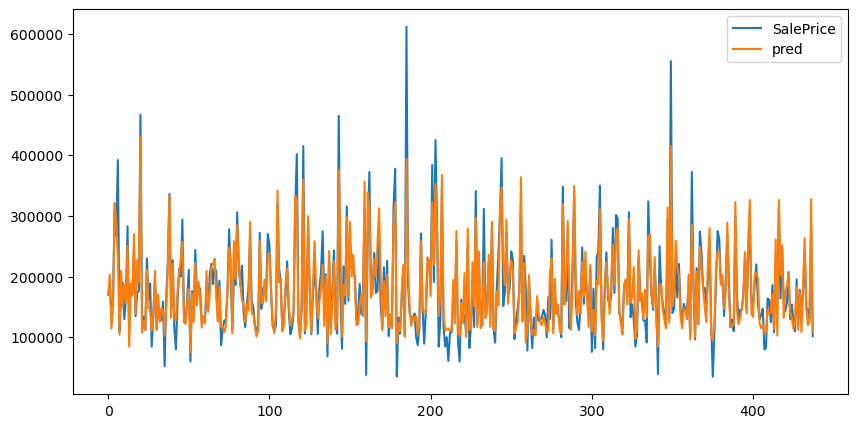

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()

# 트리계열의 알고리즘을 사용해 선분석 후 중요 변수만 추출해서 재분석

In [51]:
data2.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [53]:
X2 = data2.drop('SalePrice', axis=1)
y2 = data2['SalePrice']

In [54]:
X2_dummy = pd.get_dummies(X2).copy()

In [55]:
X2_dummy.info(max_cols=300)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 266 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1460 non-null   int64  
 1    LotFrontage            1460 non-null   float64
 2    LotArea                1460 non-null   int64  
 3    OverallQual            1460 non-null   int64  
 4    OverallCond            1460 non-null   int64  
 5    YearBuilt              1460 non-null   int64  
 6    YearRemodAdd           1460 non-null   int64  
 7    MasVnrArea             1460 non-null   float64
 8    BsmtFinSF1             1460 non-null   int64  
 9    BsmtFinSF2             1460 non-null   int64  
 10   BsmtUnfSF              1460 non-null   int64  
 11   TotalBsmtSF            1460 non-null   int64  
 12   1stFlrSF               1460 non-null   int64  
 13   2ndFlrSF               1460 non-null   int64  
 14   LowQualFinSF           1460 non-null  

In [56]:
rs2 = RobustScaler()
X2_scaled = rs2.fit_transform(X2_dummy)
X2_scaled = pd.DataFrame(X2_scaled, columns=X2_dummy.columns)
X2_scaled

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.2,-0.210526,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,-0.559829,-0.269652,-0.453608,1.173077,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.589744,0.0,0.281573,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.578947,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,-0.330769,0.538308,0.343643,0.000000,0.0,-0.312090,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.102564,0.0,-0.082816,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.052632,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,-0.074359,-0.142289,-0.327933,1.189560,0.0,0.497489,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.538462,0.0,0.530021,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.473684,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,0.106838,-0.468657,-0.247423,1.038462,0.0,0.390885,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,0.0,0.461538,1.0,0.670807,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.2,0.789474,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,0.021368,0.305473,0.113893,1.446429,0.0,1.134029,1.0,0.0,0.0,1.0,1.0,0.0,1.5,0.0,0.512821,1.0,1.474120,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [57]:
X2columns = list(X2_scaled.columns)

In [58]:
joblib.dump(X2columns, "./model/X2columns.joblib")

['./model/X2columns.joblib']

In [59]:
joblib.dump(rs2, "./model/robust_scaler_xgb.joblib")

['./model/robust_scaler_xgb.joblib']

In [60]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.3, random_state=10)

In [61]:
from xgboost import XGBRegressor

In [62]:
y2_train.describe()

count      1022.000000
mean     182072.757339
std       80628.075015
min       40000.000000
25%      130625.000000
50%      163995.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [63]:
xgbr = XGBRegressor(max_depth=5, n_estimators=1000, n_jobs=-1)
xgbr.fit(X2_train, y2_train)
pred2 = xgbr.predict(X2_test)
print("mean_squared_error", mean_squared_error(y2_test, pred2))
print("root_mean_squared_error", np.sqrt(mean_squared_error(y2_test, pred2)))
print("r-squared", r2_score(y2_test, pred2))

mean_squared_error 620143596.0728875
root_mean_squared_error 24902.6825075711
r-squared 0.8941449522972107


In [64]:
joblib.dump(xgbr, './model/xgbr_model.joblib')

['./model/xgbr_model.joblib']

In [65]:
xgb_result = pd.DataFrame(xgbr.feature_importances_, index=xgbr.feature_names_in_).sort_values(by=0, ascending=False)

In [66]:
xgb_result.head(100)

,0
OverallQual,0.264499
KitchenAbvGr,0.128635
FullBath,0.064790
BsmtQual_Ex,0.058506
ExterQual_TA,0.053220
GarageCars,0.050776
KitchenQual_Ex,0.044757
LandSlope_Sev,0.030888
ExterQual_Ex,0.030620
GrLivArea,0.019711


In [67]:
xgb_result['cumsum'] = xgb_result.cumsum()
xgb_result

,0,cumsum
OverallQual,0.264499,0.264499
KitchenAbvGr,0.128635,0.393134
FullBath,0.064790,0.457924
BsmtQual_Ex,0.058506,0.516429
ExterQual_TA,0.053220,0.569649
...,...,...
Condition2_Artery,0.000000,1.000000
CentralAir_Y,0.000000,1.000000
Electrical_FuseP,0.000000,1.000000
Electrical_Mix,0.000000,1.000000


In [68]:
xgb_result[xgb_result['cumsum'] <= 0.80]

,0,cumsum
OverallQual,0.264499,0.264499
KitchenAbvGr,0.128635,0.393134
FullBath,0.064790,0.457924
BsmtQual_Ex,0.058506,0.516429
ExterQual_TA,0.053220,0.569649
GarageCars,0.050776,0.620426
KitchenQual_Ex,0.044757,0.665183
LandSlope_Sev,0.030888,0.696071
ExterQual_Ex,0.030620,0.726690
GrLivArea,0.019711,0.746402


In [69]:
xgb_selected_col = xgb_result[xgb_result['cumsum'] <= 0.80].index

In [70]:
xgb_selected_col = list(xgb_selected_col)

In [71]:
xgb_X = X2_scaled[xgb_selected_col]

# XGBoost로 선별한 변수로 딥러닝 하기

In [72]:
X3_train, X3_test, y3_train, y3_test = train_test_split(xgb_X, y2, test_size=0.3, random_state=10)

In [73]:
inputs = Input(shape=X3_train.shape[1])
x = Dense(32, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(1)(x)
model2 = Model(inputs, x)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 32)                8224      
                                                                 
 dense_9 (Dense)             (None, 1)                 33    

In [74]:
model2.compile(loss='mean_squared_error', optimizer='adam')
early_stop2 = EarlyStopping(patience=300)
# modelpath = "./model/xgbselected_{epoch:04d}__{val_loss:.4f}.keras"
modelpath = "./model/xgbselected_best.keras"
checkpoint2 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True)
history2 = model2.fit(X3_train, y3_train, epochs=3000, batch_size=1600, 
                      validation_data=(X3_test, y3_test), callbacks=[early_stop2, checkpoint2])

Epoch 1/3000


2024-09-12 10:37:16.576890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 10:37:16.634247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:37:16.634329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 1s 830ms/step - loss: 39645016064.0000 - val_loss: 37625823232.0000
Epoch 2/3000
1/1 [==============================] - ETA: 0s - loss: 39644971008.0000

2024-09-12 10:37:17.036319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-12 10:37:17.056657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-12 10:37:17.056740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14845 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


1/1 [==============================] - 0s 124ms/step - loss: 39644971008.0000 - val_loss: 37625774080.0000
Epoch 3/3000
1/1 [==============================] - 0s 119ms/step - loss: 39644925952.0000 - val_loss: 37625733120.0000
Epoch 4/3000
1/1 [==============================] - 0s 118ms/step - loss: 39644880896.0000 - val_loss: 37625683968.0000
Epoch 5/3000
1/1 [==============================] - 0s 117ms/step - loss: 39644827648.0000 - val_loss: 37625626624.0000
Epoch 6/3000
1/1 [==============================] - 0s 118ms/step - loss: 39644766208.0000 - val_loss: 37625561088.0000
Epoch 7/3000
1/1 [==============================] - 0s 119ms/step - loss: 39644696576.0000 - val_loss: 37625487360.0000
Epoch 8/3000
1/1 [==============================] - 0s 137ms/step - loss: 39644614656.0000 - val_loss: 37625401344.0000
Epoch 9/3000
1/1 [==============================] - 0s 134ms/step - loss: 39644524544.0000 - val_loss: 37625303040.0000
Epoch 10/3000
1/1 [==============================] - 

Epoch 70/3000
1/1 [==============================] - 0s 127ms/step - loss: 37977542656.0000 - val_loss: 35923894272.0000
Epoch 71/3000
1/1 [==============================] - 0s 119ms/step - loss: 37814829056.0000 - val_loss: 35760046080.0000
Epoch 72/3000
1/1 [==============================] - 0s 133ms/step - loss: 37638451200.0000 - val_loss: 35582672896.0000
Epoch 73/3000
1/1 [==============================] - 0s 129ms/step - loss: 37447471104.0000 - val_loss: 35390869504.0000
Epoch 74/3000
1/1 [==============================] - 0s 116ms/step - loss: 37240938496.0000 - val_loss: 35183734784.0000
Epoch 75/3000
1/1 [==============================] - 0s 117ms/step - loss: 37017817088.0000 - val_loss: 34960289792.0000
Epoch 76/3000
1/1 [==============================] - 0s 117ms/step - loss: 36777058304.0000 - val_loss: 34719518720.0000
Epoch 77/3000
1/1 [==============================] - 0s 114ms/step - loss: 36517535744.0000 - val_loss: 34460377088.0000
Epoch 78/3000
1/1 [=============

Epoch 138/3000
1/1 [==============================] - 0s 128ms/step - loss: 4174783232.0000 - val_loss: 4394307584.0000
Epoch 139/3000
1/1 [==============================] - 0s 117ms/step - loss: 4087440128.0000 - val_loss: 4329972224.0000
Epoch 140/3000
1/1 [==============================] - 0s 129ms/step - loss: 4017412608.0000 - val_loss: 4281124352.0000
Epoch 141/3000
1/1 [==============================] - 0s 133ms/step - loss: 3963448320.0000 - val_loss: 4245366528.0000
Epoch 142/3000
1/1 [==============================] - 0s 136ms/step - loss: 3923323392.0000 - val_loss: 4219839232.0000
Epoch 143/3000
1/1 [==============================] - 0s 113ms/step - loss: 3894296832.0000 - val_loss: 4201618688.0000
Epoch 144/3000
1/1 [==============================] - 0s 118ms/step - loss: 3873455104.0000 - val_loss: 4187867648.0000
Epoch 145/3000
1/1 [==============================] - 0s 129ms/step - loss: 3857995008.0000 - val_loss: 4176046848.0000
Epoch 146/3000
1/1 [====================

1/1 [==============================] - 0s 131ms/step - loss: 2739759360.0000 - val_loss: 2992759296.0000
Epoch 207/3000
1/1 [==============================] - 0s 118ms/step - loss: 2726981376.0000 - val_loss: 2979134464.0000
Epoch 208/3000
1/1 [==============================] - 0s 116ms/step - loss: 2714318848.0000 - val_loss: 2965644032.0000
Epoch 209/3000
1/1 [==============================] - 0s 139ms/step - loss: 2701772544.0000 - val_loss: 2952285952.0000
Epoch 210/3000
1/1 [==============================] - 0s 148ms/step - loss: 2689329664.0000 - val_loss: 2939051008.0000
Epoch 211/3000
1/1 [==============================] - 0s 151ms/step - loss: 2676981760.0000 - val_loss: 2925945344.0000
Epoch 212/3000
1/1 [==============================] - 0s 131ms/step - loss: 2664728576.0000 - val_loss: 2912961024.0000
Epoch 213/3000
1/1 [==============================] - 0s 157ms/step - loss: 2652567808.0000 - val_loss: 2900098048.0000
Epoch 214/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 163ms/step - loss: 2059589760.0000 - val_loss: 2258969344.0000
Epoch 275/3000
1/1 [==============================] - 0s 162ms/step - loss: 2051808256.0000 - val_loss: 2250233856.0000
Epoch 276/3000
1/1 [==============================] - 0s 148ms/step - loss: 2044094080.0000 - val_loss: 2241568000.0000
Epoch 277/3000
1/1 [==============================] - 0s 123ms/step - loss: 2036418176.0000 - val_loss: 2232974336.0000
Epoch 278/3000
1/1 [==============================] - 0s 136ms/step - loss: 2028781952.0000 - val_loss: 2224433920.0000
Epoch 279/3000
1/1 [==============================] - 0s 118ms/step - loss: 2021195648.0000 - val_loss: 2215941376.0000
Epoch 280/3000
1/1 [==============================] - 0s 119ms/step - loss: 2013658880.0000 - val_loss: 2207465216.0000
Epoch 281/3000
1/1 [==============================] - 0s 130ms/step - loss: 2006180736.0000 - val_loss: 2199014656.0000
Epoch 282/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 144ms/step - loss: 1630114944.0000 - val_loss: 1758488960.0000
Epoch 343/3000
1/1 [==============================] - 0s 113ms/step - loss: 1625051392.0000 - val_loss: 1752412928.0000
Epoch 344/3000
1/1 [==============================] - 0s 114ms/step - loss: 1620014464.0000 - val_loss: 1746376192.0000
Epoch 345/3000
1/1 [==============================] - 0s 114ms/step - loss: 1615019392.0000 - val_loss: 1740357760.0000
Epoch 346/3000
1/1 [==============================] - 0s 115ms/step - loss: 1610068480.0000 - val_loss: 1734357248.0000
Epoch 347/3000
1/1 [==============================] - 0s 128ms/step - loss: 1605145856.0000 - val_loss: 1728376192.0000
Epoch 348/3000
1/1 [==============================] - 0s 139ms/step - loss: 1600251520.0000 - val_loss: 1722415744.0000
Epoch 349/3000
1/1 [==============================] - 0s 122ms/step - loss: 1595393536.0000 - val_loss: 1716493568.0000
Epoch 350/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 116ms/step - loss: 1366688768.0000 - val_loss: 1435522688.0000
Epoch 411/3000
1/1 [==============================] - 0s 114ms/step - loss: 1363785728.0000 - val_loss: 1431916544.0000
Epoch 412/3000
1/1 [==============================] - 0s 118ms/step - loss: 1360900992.0000 - val_loss: 1428331776.0000
Epoch 413/3000
1/1 [==============================] - 0s 116ms/step - loss: 1358051840.0000 - val_loss: 1424768128.0000
Epoch 414/3000
1/1 [==============================] - 0s 125ms/step - loss: 1355280384.0000 - val_loss: 1421196416.0000
Epoch 415/3000
1/1 [==============================] - 0s 116ms/step - loss: 1352521600.0000 - val_loss: 1417646080.0000
Epoch 416/3000
1/1 [==============================] - 0s 113ms/step - loss: 1349767552.0000 - val_loss: 1414175744.0000
Epoch 417/3000
1/1 [==============================] - 0s 112ms/step - loss: 1347058304.0000 - val_loss: 1410751360.0000
Epoch 418/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 121ms/step - loss: 1224767616.0000 - val_loss: 1254065024.0000
Epoch 479/3000
1/1 [==============================] - 0s 118ms/step - loss: 1223346048.0000 - val_loss: 1252258944.0000
Epoch 480/3000
1/1 [==============================] - 0s 118ms/step - loss: 1221934720.0000 - val_loss: 1250431104.0000
Epoch 481/3000
1/1 [==============================] - 0s 116ms/step - loss: 1220545792.0000 - val_loss: 1248658432.0000
Epoch 482/3000
1/1 [==============================] - 0s 118ms/step - loss: 1219164928.0000 - val_loss: 1246936832.0000
Epoch 483/3000
1/1 [==============================] - 0s 125ms/step - loss: 1217791872.0000 - val_loss: 1245264256.0000
Epoch 484/3000
1/1 [==============================] - 0s 114ms/step - loss: 1216441216.0000 - val_loss: 1243606912.0000
Epoch 485/3000
1/1 [==============================] - 0s 116ms/step - loss: 1215107968.0000 - val_loss: 1241868416.0000
Epoch 486/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 120ms/step - loss: 1155841152.0000 - val_loss: 1166675968.0000
Epoch 547/3000
1/1 [==============================] - 0s 109ms/step - loss: 1155171712.0000 - val_loss: 1165842688.0000
Epoch 548/3000
1/1 [==============================] - 0s 129ms/step - loss: 1154500224.0000 - val_loss: 1165051392.0000
Epoch 549/3000
1/1 [==============================] - 0s 114ms/step - loss: 1153834240.0000 - val_loss: 1164296704.0000
Epoch 550/3000
1/1 [==============================] - 0s 113ms/step - loss: 1153172992.0000 - val_loss: 1163498880.0000
Epoch 551/3000
1/1 [==============================] - 0s 110ms/step - loss: 1152536448.0000 - val_loss: 1162663040.0000
Epoch 552/3000
1/1 [==============================] - 0s 112ms/step - loss: 1151900672.0000 - val_loss: 1161856000.0000
Epoch 553/3000
1/1 [==============================] - 0s 111ms/step - loss: 1151278720.0000 - val_loss: 1161076736.0000
Epoch 554/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 117ms/step - loss: 1123501952.0000 - val_loss: 1127944192.0000
Epoch 615/3000
1/1 [==============================] - 0s 127ms/step - loss: 1123177216.0000 - val_loss: 1127596544.0000
Epoch 616/3000
1/1 [==============================] - 0s 125ms/step - loss: 1122850816.0000 - val_loss: 1127255680.0000
Epoch 617/3000
1/1 [==============================] - 0s 127ms/step - loss: 1122521344.0000 - val_loss: 1126933120.0000
Epoch 618/3000
1/1 [==============================] - 0s 136ms/step - loss: 1122191616.0000 - val_loss: 1126637312.0000
Epoch 619/3000
1/1 [==============================] - 0s 118ms/step - loss: 1121862272.0000 - val_loss: 1126348800.0000
Epoch 620/3000
1/1 [==============================] - 0s 131ms/step - loss: 1121577984.0000 - val_loss: 1126012032.0000
Epoch 621/3000
1/1 [==============================] - 0s 150ms/step - loss: 1121275520.0000 - val_loss: 1125636224.0000
Epoch 622/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 147ms/step - loss: 1105249536.0000 - val_loss: 1107872256.0000
Epoch 683/3000
1/1 [==============================] - 0s 154ms/step - loss: 1105011584.0000 - val_loss: 1107654656.0000
Epoch 684/3000
1/1 [==============================] - 0s 151ms/step - loss: 1104766848.0000 - val_loss: 1107437696.0000
Epoch 685/3000
1/1 [==============================] - 0s 141ms/step - loss: 1104530944.0000 - val_loss: 1107234176.0000
Epoch 686/3000
1/1 [==============================] - 0s 145ms/step - loss: 1104320512.0000 - val_loss: 1106997120.0000
Epoch 687/3000
1/1 [==============================] - 0s 126ms/step - loss: 1104104576.0000 - val_loss: 1106730880.0000
Epoch 688/3000
1/1 [==============================] - 0s 127ms/step - loss: 1103855104.0000 - val_loss: 1106439808.0000
Epoch 689/3000
1/1 [==============================] - 0s 119ms/step - loss: 1103631360.0000 - val_loss: 1106176512.0000
Epoch 690/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 119ms/step - loss: 1092497920.0000 - val_loss: 1096316032.0000
Epoch 751/3000
1/1 [==============================] - 0s 119ms/step - loss: 1092340096.0000 - val_loss: 1096223360.0000
Epoch 752/3000
1/1 [==============================] - 0s 119ms/step - loss: 1092184448.0000 - val_loss: 1096151680.0000
Epoch 753/3000
1/1 [==============================] - 0s 116ms/step - loss: 1092058880.0000 - val_loss: 1096033408.0000
Epoch 754/3000
1/1 [==============================] - 0s 115ms/step - loss: 1091907200.0000 - val_loss: 1095872768.0000
Epoch 755/3000
1/1 [==============================] - 0s 119ms/step - loss: 1091738752.0000 - val_loss: 1095742336.0000
Epoch 756/3000
1/1 [==============================] - 0s 133ms/step - loss: 1091598592.0000 - val_loss: 1095617664.0000
Epoch 757/3000
1/1 [==============================] - 0s 109ms/step - loss: 1091458688.0000 - val_loss: 1095509248.0000
Epoch 758/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 127ms/step - loss: 1084103424.0000 - val_loss: 1090414592.0000
Epoch 819/3000
1/1 [==============================] - 0s 118ms/step - loss: 1083992576.0000 - val_loss: 1090400512.0000
Epoch 820/3000
1/1 [==============================] - 0s 116ms/step - loss: 1083899008.0000 - val_loss: 1090350080.0000
Epoch 821/3000
1/1 [==============================] - 0s 114ms/step - loss: 1083778432.0000 - val_loss: 1090255744.0000
Epoch 822/3000
1/1 [==============================] - 0s 117ms/step - loss: 1083674368.0000 - val_loss: 1090170112.0000
Epoch 823/3000
1/1 [==============================] - 0s 112ms/step - loss: 1083577472.0000 - val_loss: 1090103808.0000
Epoch 824/3000
1/1 [==============================] - 0s 109ms/step - loss: 1083471616.0000 - val_loss: 1090055168.0000
Epoch 825/3000
1/1 [==============================] - 0s 113ms/step - loss: 1083364608.0000 - val_loss: 1090035840.0000
Epoch 826/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 124ms/step - loss: 1077186048.0000 - val_loss: 1087434624.0000
Epoch 887/3000
1/1 [==============================] - 0s 116ms/step - loss: 1077084416.0000 - val_loss: 1087413120.0000
Epoch 888/3000
1/1 [==============================] - 0s 121ms/step - loss: 1077002112.0000 - val_loss: 1087341952.0000
Epoch 889/3000
1/1 [==============================] - 0s 112ms/step - loss: 1076898560.0000 - val_loss: 1087287424.0000
Epoch 890/3000
1/1 [==============================] - 0s 120ms/step - loss: 1076812672.0000 - val_loss: 1087264512.0000
Epoch 891/3000
1/1 [==============================] - 0s 122ms/step - loss: 1076714496.0000 - val_loss: 1087220608.0000
Epoch 892/3000
1/1 [==============================] - 0s 121ms/step - loss: 1076632576.0000 - val_loss: 1087180800.0000
Epoch 893/3000
1/1 [==============================] - 0s 120ms/step - loss: 1076546432.0000 - val_loss: 1087145600.0000
Epoch 894/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 114ms/step - loss: 1071123520.0000 - val_loss: 1084605696.0000
Epoch 955/3000
1/1 [==============================] - 0s 114ms/step - loss: 1071045440.0000 - val_loss: 1084556160.0000
Epoch 956/3000
1/1 [==============================] - 0s 116ms/step - loss: 1070964928.0000 - val_loss: 1084528000.0000
Epoch 957/3000
1/1 [==============================] - 0s 115ms/step - loss: 1070868928.0000 - val_loss: 1084517760.0000
Epoch 958/3000
1/1 [==============================] - 0s 46ms/step - loss: 1070774080.0000 - val_loss: 1084520704.0000
Epoch 959/3000
1/1 [==============================] - 0s 126ms/step - loss: 1070718208.0000 - val_loss: 1084499968.0000
Epoch 960/3000
1/1 [==============================] - 0s 132ms/step - loss: 1070634560.0000 - val_loss: 1084444032.0000
Epoch 961/3000
1/1 [==============================] - 0s 113ms/step - loss: 1070539008.0000 - val_loss: 1084392064.0000
Epoch 962/3000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 118ms/step - loss: 1065765824.0000 - val_loss: 1083186176.0000
Epoch 1023/3000
1/1 [==============================] - 0s 114ms/step - loss: 1065701824.0000 - val_loss: 1083184512.0000
Epoch 1024/3000
1/1 [==============================] - 0s 43ms/step - loss: 1065631488.0000 - val_loss: 1083196032.0000
Epoch 1025/3000
1/1 [==============================] - 0s 46ms/step - loss: 1065548032.0000 - val_loss: 1083216128.0000
Epoch 1026/3000
1/1 [==============================] - 0s 44ms/step - loss: 1065461312.0000 - val_loss: 1083229824.0000
Epoch 1027/3000
1/1 [==============================] - 0s 42ms/step - loss: 1065404672.0000 - val_loss: 1083191424.0000
Epoch 1028/3000
1/1 [==============================] - 0s 116ms/step - loss: 1065337472.0000 - val_loss: 1083117568.0000
Epoch 1029/3000
1/1 [==============================] - 0s 116ms/step - loss: 1065245632.0000 - val_loss: 1083058688.0000
Epoch 1030/3000
1/1 [==============================]

1/1 [==============================] - 0s 45ms/step - loss: 1061063360.0000 - val_loss: 1082249472.0000
Epoch 1091/3000
1/1 [==============================] - 0s 47ms/step - loss: 1060986752.0000 - val_loss: 1082287616.0000
Epoch 1092/3000
1/1 [==============================] - 0s 49ms/step - loss: 1060949632.0000 - val_loss: 1082283648.0000
Epoch 1093/3000
1/1 [==============================] - 0s 51ms/step - loss: 1060886848.0000 - val_loss: 1082243328.0000
Epoch 1094/3000
1/1 [==============================] - 0s 130ms/step - loss: 1060801216.0000 - val_loss: 1082214144.0000
Epoch 1095/3000
1/1 [==============================] - 0s 119ms/step - loss: 1060740672.0000 - val_loss: 1082182400.0000
Epoch 1096/3000
1/1 [==============================] - 0s 132ms/step - loss: 1060681984.0000 - val_loss: 1082156928.0000
Epoch 1097/3000
1/1 [==============================] - 0s 119ms/step - loss: 1060629888.0000 - val_loss: 1082151424.0000
Epoch 1098/3000
1/1 [==============================]

1/1 [==============================] - 0s 122ms/step - loss: 1056613696.0000 - val_loss: 1081622528.0000
Epoch 1159/3000
1/1 [==============================] - 0s 120ms/step - loss: 1056552512.0000 - val_loss: 1081598720.0000
Epoch 1160/3000
1/1 [==============================] - 0s 115ms/step - loss: 1056478976.0000 - val_loss: 1081588352.0000
Epoch 1161/3000
1/1 [==============================] - 0s 41ms/step - loss: 1056408832.0000 - val_loss: 1081602816.0000
Epoch 1162/3000
1/1 [==============================] - 0s 43ms/step - loss: 1056352832.0000 - val_loss: 1081618048.0000
Epoch 1163/3000
1/1 [==============================] - 0s 45ms/step - loss: 1056285056.0000 - val_loss: 1081597312.0000
Epoch 1164/3000
1/1 [==============================] - 0s 117ms/step - loss: 1056220608.0000 - val_loss: 1081578880.0000
Epoch 1165/3000
1/1 [==============================] - 0s 116ms/step - loss: 1056150528.0000 - val_loss: 1081560192.0000
Epoch 1166/3000
1/1 [==============================

1/1 [==============================] - 0s 41ms/step - loss: 1052213568.0000 - val_loss: 1080781184.0000
Epoch 1227/3000
1/1 [==============================] - 0s 45ms/step - loss: 1052147392.0000 - val_loss: 1080788352.0000
Epoch 1228/3000
1/1 [==============================] - 0s 42ms/step - loss: 1052079808.0000 - val_loss: 1080807680.0000
Epoch 1229/3000
1/1 [==============================] - 0s 43ms/step - loss: 1052001792.0000 - val_loss: 1080849152.0000
Epoch 1230/3000
1/1 [==============================] - 0s 43ms/step - loss: 1051953728.0000 - val_loss: 1080850304.0000
Epoch 1231/3000
1/1 [==============================] - 0s 57ms/step - loss: 1051890368.0000 - val_loss: 1080813952.0000
Epoch 1232/3000
1/1 [==============================] - 0s 42ms/step - loss: 1051796224.0000 - val_loss: 1080789248.0000
Epoch 1233/3000
1/1 [==============================] - 0s 42ms/step - loss: 1051736960.0000 - val_loss: 1080780288.0000
Epoch 1234/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 42ms/step - loss: 1047459072.0000 - val_loss: 1079777536.0000
Epoch 1295/3000
1/1 [==============================] - 0s 43ms/step - loss: 1047387904.0000 - val_loss: 1079784448.0000
Epoch 1296/3000
1/1 [==============================] - 0s 42ms/step - loss: 1047332608.0000 - val_loss: 1079786624.0000
Epoch 1297/3000
1/1 [==============================] - 0s 45ms/step - loss: 1047262848.0000 - val_loss: 1079783168.0000
Epoch 1298/3000
1/1 [==============================] - 0s 132ms/step - loss: 1047198784.0000 - val_loss: 1079724800.0000
Epoch 1299/3000
1/1 [==============================] - 0s 118ms/step - loss: 1047118976.0000 - val_loss: 1079682176.0000
Epoch 1300/3000
1/1 [==============================] - 0s 117ms/step - loss: 1047048256.0000 - val_loss: 1079649920.0000
Epoch 1301/3000
1/1 [==============================] - 0s 117ms/step - loss: 1046972224.0000 - val_loss: 1079643776.0000
Epoch 1302/3000
1/1 [==============================]

1/1 [==============================] - 0s 43ms/step - loss: 1042562112.0000 - val_loss: 1078615296.0000
Epoch 1363/3000
1/1 [==============================] - 0s 128ms/step - loss: 1042489984.0000 - val_loss: 1078576000.0000
Epoch 1364/3000
1/1 [==============================] - 0s 111ms/step - loss: 1042420608.0000 - val_loss: 1078574592.0000
Epoch 1365/3000
1/1 [==============================] - 0s 43ms/step - loss: 1042350336.0000 - val_loss: 1078593152.0000
Epoch 1366/3000
1/1 [==============================] - 0s 42ms/step - loss: 1042285056.0000 - val_loss: 1078598912.0000
Epoch 1367/3000
1/1 [==============================] - 0s 43ms/step - loss: 1042198976.0000 - val_loss: 1078594176.0000
Epoch 1368/3000
1/1 [==============================] - 0s 43ms/step - loss: 1042122432.0000 - val_loss: 1078599552.0000
Epoch 1369/3000
1/1 [==============================] - 0s 44ms/step - loss: 1042065408.0000 - val_loss: 1078580352.0000
Epoch 1370/3000
1/1 [==============================] -

1/1 [==============================] - 0s 46ms/step - loss: 1037714496.0000 - val_loss: 1078675712.0000
Epoch 1431/3000
1/1 [==============================] - 0s 42ms/step - loss: 1037646528.0000 - val_loss: 1078655360.0000
Epoch 1432/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037587776.0000 - val_loss: 1078619136.0000
Epoch 1433/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037517632.0000 - val_loss: 1078598272.0000
Epoch 1434/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037452032.0000 - val_loss: 1078586752.0000
Epoch 1435/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037403456.0000 - val_loss: 1078603392.0000
Epoch 1436/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037340032.0000 - val_loss: 1078652672.0000
Epoch 1437/3000
1/1 [==============================] - 0s 44ms/step - loss: 1037253568.0000 - val_loss: 1078723200.0000
Epoch 1438/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 46ms/step - loss: 1033319744.0000 - val_loss: 1079172480.0000
Epoch 1499/3000
1/1 [==============================] - 0s 44ms/step - loss: 1033255424.0000 - val_loss: 1079186176.0000
Epoch 1500/3000
1/1 [==============================] - 0s 52ms/step - loss: 1033189056.0000 - val_loss: 1079158400.0000
Epoch 1501/3000
1/1 [==============================] - 0s 45ms/step - loss: 1033117248.0000 - val_loss: 1079142784.0000
Epoch 1502/3000
1/1 [==============================] - 0s 42ms/step - loss: 1033048704.0000 - val_loss: 1079141376.0000
Epoch 1503/3000
1/1 [==============================] - 0s 43ms/step - loss: 1032989056.0000 - val_loss: 1079124736.0000
Epoch 1504/3000
1/1 [==============================] - 0s 44ms/step - loss: 1032919680.0000 - val_loss: 1079116800.0000
Epoch 1505/3000
1/1 [==============================] - 0s 46ms/step - loss: 1032831488.0000 - val_loss: 1079107712.0000
Epoch 1506/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 46ms/step - loss: 1028740160.0000 - val_loss: 1079532544.0000
Epoch 1567/3000
1/1 [==============================] - 0s 48ms/step - loss: 1028672960.0000 - val_loss: 1079564032.0000
Epoch 1568/3000
1/1 [==============================] - 0s 44ms/step - loss: 1028608192.0000 - val_loss: 1079618816.0000
Epoch 1569/3000
1/1 [==============================] - 0s 43ms/step - loss: 1028538240.0000 - val_loss: 1079692032.0000
Epoch 1570/3000
1/1 [==============================] - 0s 44ms/step - loss: 1028472000.0000 - val_loss: 1079723264.0000
Epoch 1571/3000
1/1 [==============================] - 0s 46ms/step - loss: 1028433536.0000 - val_loss: 1079697664.0000
Epoch 1572/3000
1/1 [==============================] - 0s 46ms/step - loss: 1028369472.0000 - val_loss: 1079663488.0000
Epoch 1573/3000
1/1 [==============================] - 0s 46ms/step - loss: 1028295488.0000 - val_loss: 1079634304.0000
Epoch 1574/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 42ms/step - loss: 1024371264.0000 - val_loss: 1080112640.0000
Epoch 1635/3000
1/1 [==============================] - 0s 43ms/step - loss: 1024312576.0000 - val_loss: 1080118656.0000
Epoch 1636/3000
1/1 [==============================] - 0s 43ms/step - loss: 1024256384.0000 - val_loss: 1080121088.0000
Epoch 1637/3000
1/1 [==============================] - 0s 41ms/step - loss: 1024191360.0000 - val_loss: 1080122368.0000
Epoch 1638/3000
1/1 [==============================] - 0s 42ms/step - loss: 1024144320.0000 - val_loss: 1080083072.0000
Epoch 1639/3000
1/1 [==============================] - 0s 44ms/step - loss: 1024069696.0000 - val_loss: 1080011776.0000
Epoch 1640/3000
1/1 [==============================] - 0s 43ms/step - loss: 1024018560.0000 - val_loss: 1079977856.0000
Epoch 1641/3000
1/1 [==============================] - 0s 45ms/step - loss: 1023963264.0000 - val_loss: 1079986432.0000
Epoch 1642/3000
1/1 [==============================] - 0